<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_2E7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [ ]:
df = pd.read_csv(path7)

<ipython-input-4-a0e962f47e45>:1: DtypeWarning: Columns (1,2,3,5,6,8,9,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path7)


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4377108,5344794,NaN,NaN,NaN,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377109,5344795,NaN,NaN,NaN,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN
4377110,5344796,NaN,NaN,NaN,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377111,5344797,NaN,NaN,NaN,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN
4377112,5344798,NaN,NaN,NaN,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN


In [ ]:
df.shape

(4377113, 18)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,4.377113e+06,33622.000000,4.377113e+06
mean,2.426505e+06,6.324332,1.194532e-02
std,1.484919e+06,1.632369,1.086399e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,1.097298e+06,4.300000,0.000000e+00
50%,2.563283e+06,7.500000,0.000000e+00
75%,3.672990e+06,7.500000,0.000000e+00
max,5.344798e+06,8.800000,1.000000e+00


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,4377113
Description,29
Type,4
Pattern,29
Code,4339979
Severity,4
Input Case,2
CVSS,10
CWE_ID,22
CWE_Desc,23


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    4324827
1      52286
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4377108,5344794,NaN,NaN,NaN,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377109,5344795,NaN,NaN,NaN,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN
4377110,5344796,NaN,NaN,NaN,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377111,5344797,NaN,NaN,NaN,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN
4377112,5344798,NaN,NaN,NaN,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
80,80,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""MainActivity"", ""Could not get data dire...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e)",NaN,NaN,NaN
304,304,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.printf(prompt);,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.printf(prompt);,NaN,NaN,NaN
308,308,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.println(shell.runCommand(cmd));,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(shell.runCommand(cmd));,NaN,NaN,NaN
332,332,App can write to App Directory. Sensitive Info...,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",val sp = app.getPreferences(Context.MODE_PRIVATE),info,exact,3.9,CWE-276,Incorrect Default Permissions,NaN,MSTG-STORAGE-14,NaN,1,val sp = app.getPreferences(Context.MODE_PRIVATE),NaN,NaN,NaN
516,516,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""Failed to parse color"", e);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"", e);",NaN,NaN,NaN


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4376693,5344367,NaN,NaN,NaN,radarWebView.getSettings().setDomStorageEnable...,NaN,NaN,NaN,CWE-79,Improper Neutralization of Input During Web Pa...,NaN,NaN,NaN,1,radarWebView.getSettings().setDomStorageEnable...,webview,WARNING,Webview enables DOM Storage
4376791,5344470,NaN,NaN,NaN,radarWebView.getSettings().setJavaScriptEnable...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,radarWebView.getSettings().setJavaScriptEnable...,webview,WARNING,Javascript enabled in Webview
4376798,5344477,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview
4376823,5344503,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview
4376849,5344529,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    52286
0    52286
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

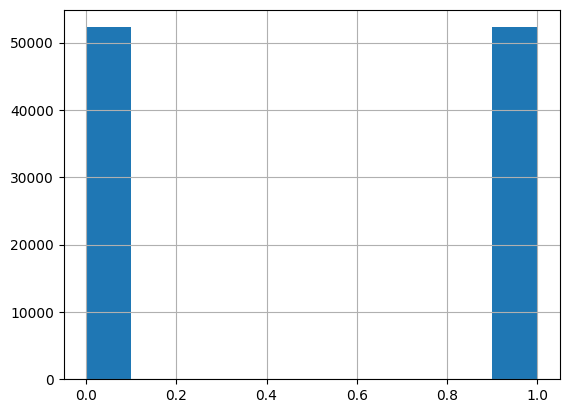

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,3895797,NaN,NaN,NaN,File var5 = Environment.getExternalStoragePubl...,NaN,NaN,NaN,CWE-921,Storage of Sensitive Data in a Mechanism witho...,NaN,NaN,NaN,1,File var5 = Environment.getExternalStoragePubl...,file,WARNING,External storage used
1,3094666,NaN,NaN,NaN,"private Drawable method_3413(Context var1, int...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"private Drawable method_3413(Context var1, int...",NaN,NaN,NaN
2,1484894,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(""scoop"", ""hookUncaughtException ("" + mPkg",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + mPkg",NaN,NaN,NaN
3,1116322,NaN,NaN,NaN,public static void setupPath() {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static void setupPath() {,NaN,NaN,NaN
4,1707717,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.i(""ChatProvider"", ""Room history for "" + ac...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"", ""user_str"" + account + ""user...",NaN,NaN,NaN


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,3895797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,File var5 = Environment.getExternalStoragePubl...,file,WARNING,External storage used
1,3094666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"private Drawable method_3413(Context var1, int...",NaN,NaN,NaN
2,1484894,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + mPkg",NaN,NaN,NaN
3,1116322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static void setupPath() {,NaN,NaN,NaN
4,1707717,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"", ""user_str"" + account + ""user...",NaN,NaN,NaN
5,3333821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.d(OfflineVideoManager.LOG_TAG, ""user_str"" ...",file,WARNING,Logging found
6,453754,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,binding.cExtra.setVisibility(View.GONE);,NaN,NaN,NaN
7,2796493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object = new b(view);,NaN,NaN,NaN
8,3627397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (this.i0()) {,NaN,NaN,NaN
9,5190803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"run(Control.write(String.valueOf(value), MAKO_...",NaN,NaN,NaN


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
104562,1755798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,for (int i = 0; i < hostname.length(); i++) {,NaN,NaN,NaN
104563,2186000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,for (File f : context.getExternalMediaDirs()) {,file,WARNING,External storage used
104564,5009245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,* DateMidnight added = dt.plus(Period.years(6));,NaN,NaN,NaN
104565,1498263,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(DEBUG_TAG, e.getMessage() + e.getCode());",NaN,NaN,NaN
104566,1103632,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", apiVer.toString())",NaN,NaN,NaN
104567,2310109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,} catch (final IllegalStateException exception) {,NaN,NaN,NaN
104568,2976314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.g.d(e0.l(), nanoTime - nanoTime2);",NaN,NaN,NaN
104569,1065022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private boolean foreground = true;,NaN,NaN,NaN
104570,1480283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"setSessionState(sessionId, new SaiPiSessionSta...",NaN,NaN,NaN
104571,547359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,backupStatus.addAll(statuses);,NaN,NaN,NaN


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,File var5 = Environment.getExternalStoragePubl...,1
1,"private Drawable method_3413(Context var1, int...",0
2,"Log.d(""user_str"", ""user_str"" + mPkg",1
3,public static void setupPath() {,0
4,"Log.i(""user_str"", ""user_str"" + account + ""user...",1


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,File var5 = Environment.getExternalStoragePubl...,1
1,"private Drawable method_3413(Context var1, int...",0
2,"Log.d(""user_str"", ""user_str"" + mPkg",1
3,public static void setupPath() {,0
4,"Log.i(""user_str"", ""user_str"" + account + ""user...",1


In [ ]:
df_balanced.head(5)

,text,labels
0,File var5 = Environment.getExternalStoragePubl...,1
1,"private Drawable method_3413(Context var1, int...",0
2,"Log.d(""user_str"", ""user_str"" + mPkg",1
3,public static void setupPath() {,0
4,"Log.i(""user_str"", ""user_str"" + account + ""user...",1


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 104572
    })
})

In [ ]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 83657
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 20915
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/83657 [00:00<?, ? examples/s]

Map:   0%|          | 0/20915 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  recalls = recall_score(labels, predictions, average = 'binary')
  precisions = precision_score(labels, predictions, average = "binary")
  return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.114800,0.176494,0.959168,0.942008,0.975561,0.958491
2,0.119200,0.146804,0.964236,0.957868,0.970289,0.964038
3,0.088200,0.140943,0.965623,0.964746,0.966501,0.965623


TrainOutput(global_step=15687, training_loss=0.1167269322690844, metrics={'train_runtime': 5382.9261, 'train_samples_per_second': 46.624, 'train_steps_per_second': 2.914, 'total_flos': 6.603324467475456e+16, 'train_loss': 0.1167269322690844, 'epoch': 3.0})